# Start Project

Import necessary Libraries

In [1]:
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Import the csv file using pandas

In [2]:
data = pd.read_csv("heart.csv")

Check the missing value and replace with (-99999), so that python will ignore

In [3]:
# Preprocess the data
data.replace('?',-99999, inplace=True)
print(data.axes)

print(data.columns)

[RangeIndex(start=0, stop=303, step=1), Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Visualize the random row and shape of dataset

In [4]:
#visualize and explore the data
print(data.loc[10])

# Print the shape of the dataset
print(data.shape)

age          54.0
sex           1.0
cp            0.0
trestbps    140.0
chol        239.0
fbs           0.0
restecg       1.0
thalach     160.0
exang         0.0
oldpeak       1.2
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 10, dtype: float64
(303, 14)


Now look at the stastical values of Dataset

In [5]:
#describing the data
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

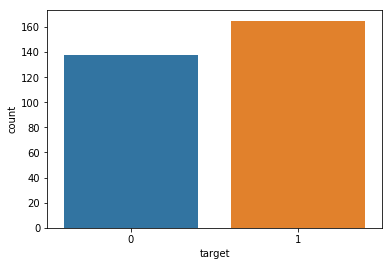

In [9]:
#Plot graph for this 
sns.countplot(x="target", data=data)
plt.show()

In [11]:
NoDisease = len(data[data.target == 0])
HaveDisease = len(data[data.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((NoDisease / (len(data.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((HaveDisease / (len(data.target))*100)))

Percentage of Patients without Heart Disease: 45.54%
Percentage of Patients with Heart Disease: 54.46%


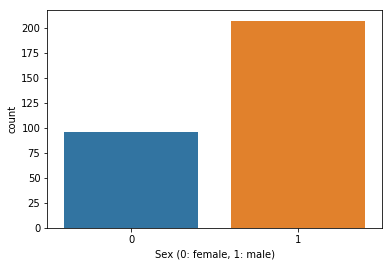

In [13]:
#Plot for male and female
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0: female, 1: male)")
plt.show()

Plot the Histogram of each attribute

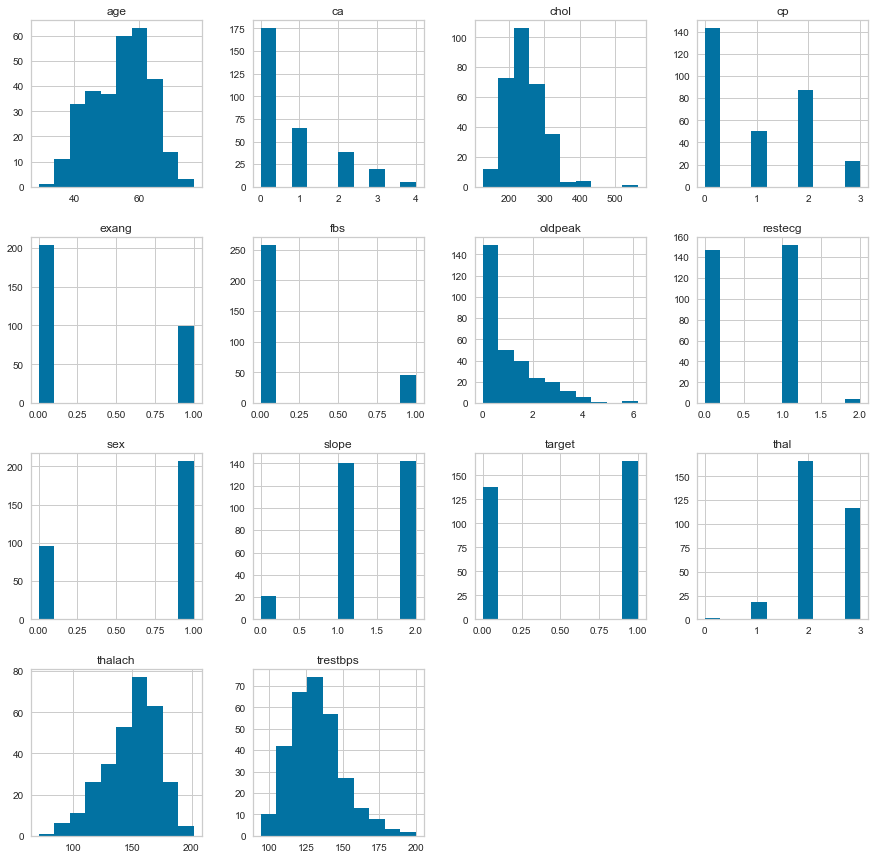

In [86]:
#Plotting the data
data.hist(figsize=(15,15))
plt.show()

Plot the scatter matrix to look more deep for the relationship between attributes

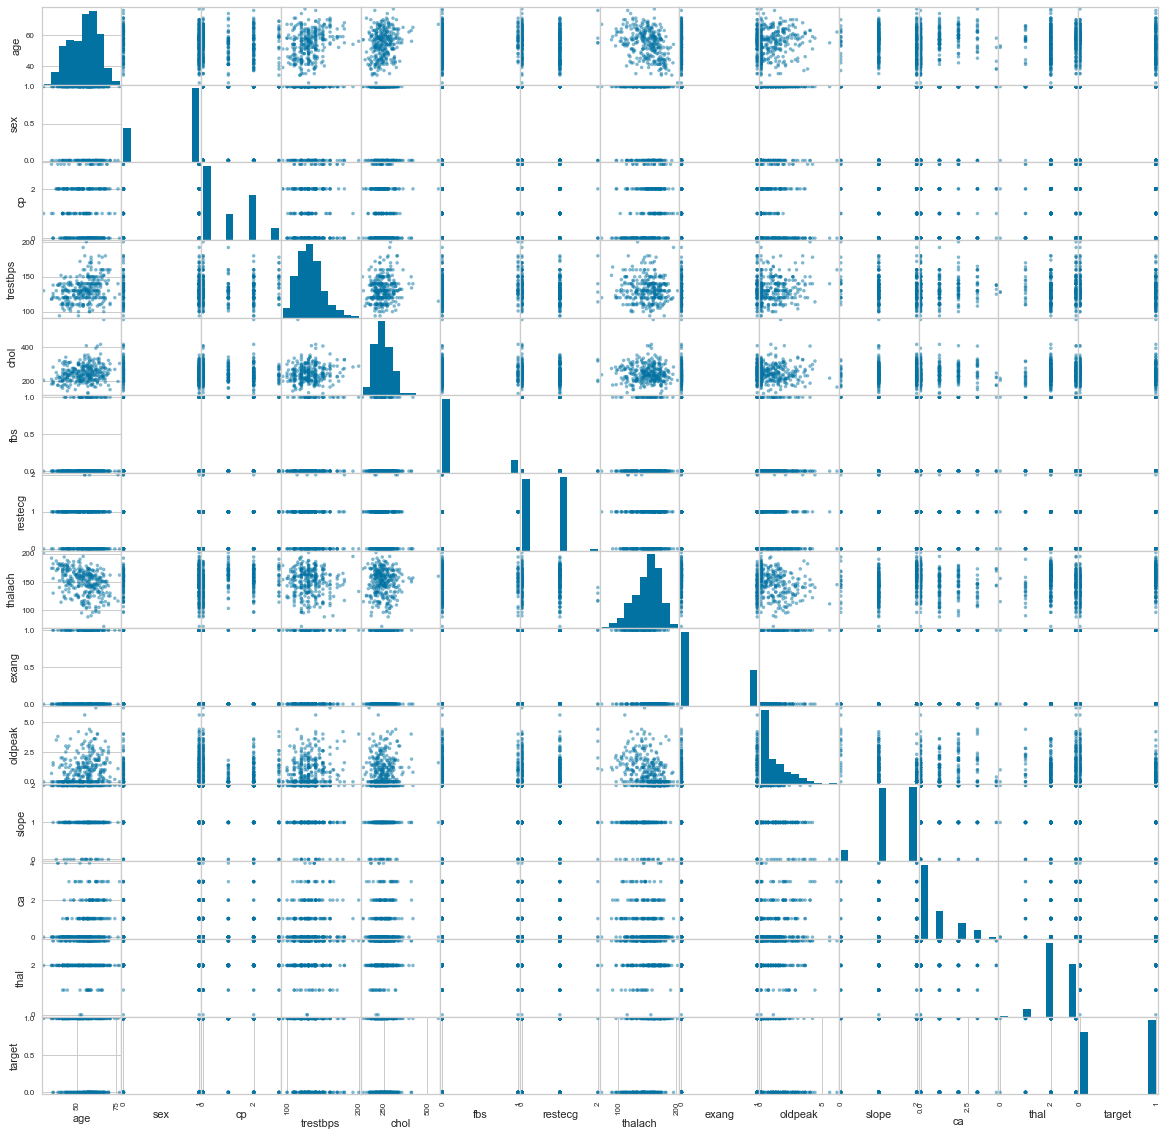

In [87]:
#scattering the plot
scatter_matrix(data, figsize=(20,20))
plt.show()

In this step we will plot the correlation matrix to see the correlation between attributes. This also help us in determining that which attributes have high correlation and then we can decide which attribute is important for us. In Python the correlation values lie between (-1 and 1). There are two key components of a correlation value:

magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation.
sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

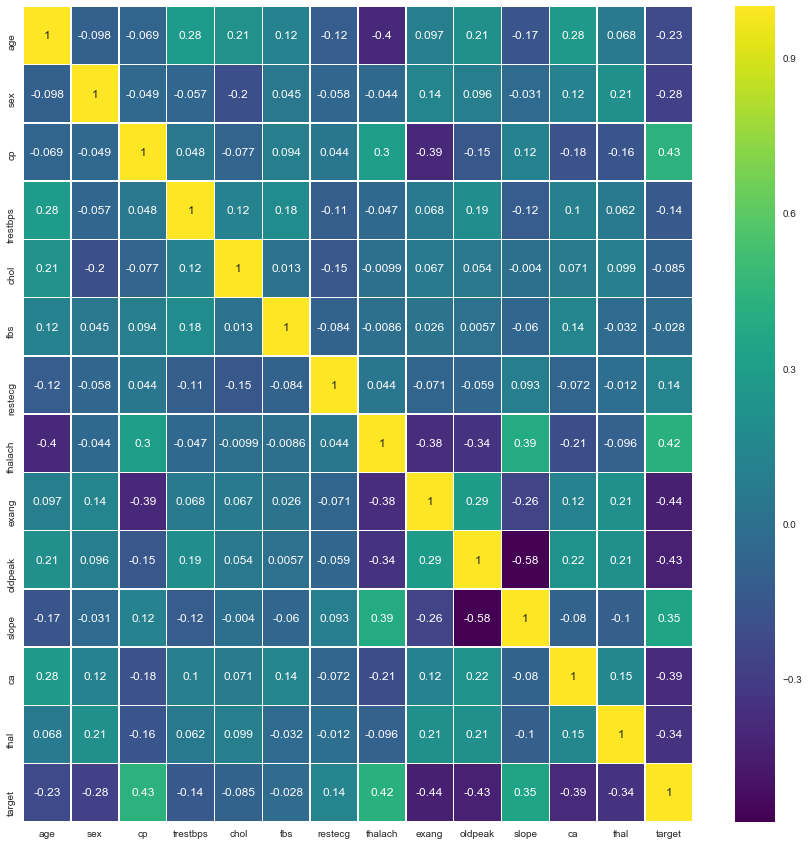

In [88]:
# Correlation matrix
corrmat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidths=0.5,)

Assign the data in two variables X and y, and from correlation matrix we got the idea of all the necessary attributes.

In [89]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["target", "chol", "fbs", "restecg", "testbps"]]

# Store the variable we'll be predicting on
target = "target"

X = data[columns]
y = data[target]

# Print shapes
print(X.shape)
print(y.shape)

(303, 10)
(303,)


In [90]:
print(X.loc[26])
print(y.loc[26])

age          59.0
sex           1.0
cp            2.0
trestbps    150.0
thalach     157.0
exang         0.0
oldpeak       1.6
slope         2.0
ca            0.0
thal          2.0
Name: 26, dtype: float64
1


This step is very important as we will spit our data into the training and testing to check the accuracy and for this we will use (model selection) library. When you’re working on a model and want to train it, you obviously have a dataset. But after training, we have to test the model on some test dataset. To do this we will split the dataset into two sets, one for training and the other for testing; and you do this before you start training your model.

In [91]:
#Creating X and y datasets for training
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

In [92]:
#Specify the testing option

scoring = 'accuracy'

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(242, 10) (61, 10)
(242,) (61,)


In this step we will import all the algorithms we want to compare and then check the result of each algo for 5 Fold cross validation.

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [94]:
# Define models to train


models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('NaiveB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(max_depth=5)))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=10, n_estimators=40)))

In [95]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.611395 (0.091869)
NaiveB: 0.805272 (0.051656)
CART: 0.752041 (0.034547)
ADA: 0.810034 (0.023042)
RFC: 0.813946 (0.035111)


Let's see the result of all 5 KFolds for Random Forest

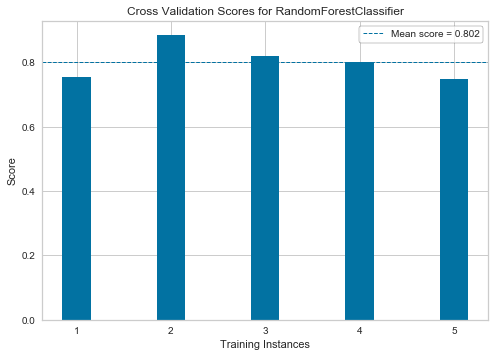

In [96]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots()

cv = StratifiedKFold(5)

oz = CVScores(RandomForestClassifier(max_depth=10, n_estimators = 40), ax=ax, cv=cv, scoring= 'accuracy')
oz.fit(X,y)
oz.poof()

In this step we will do the Algorithms comparison using box plot visualization

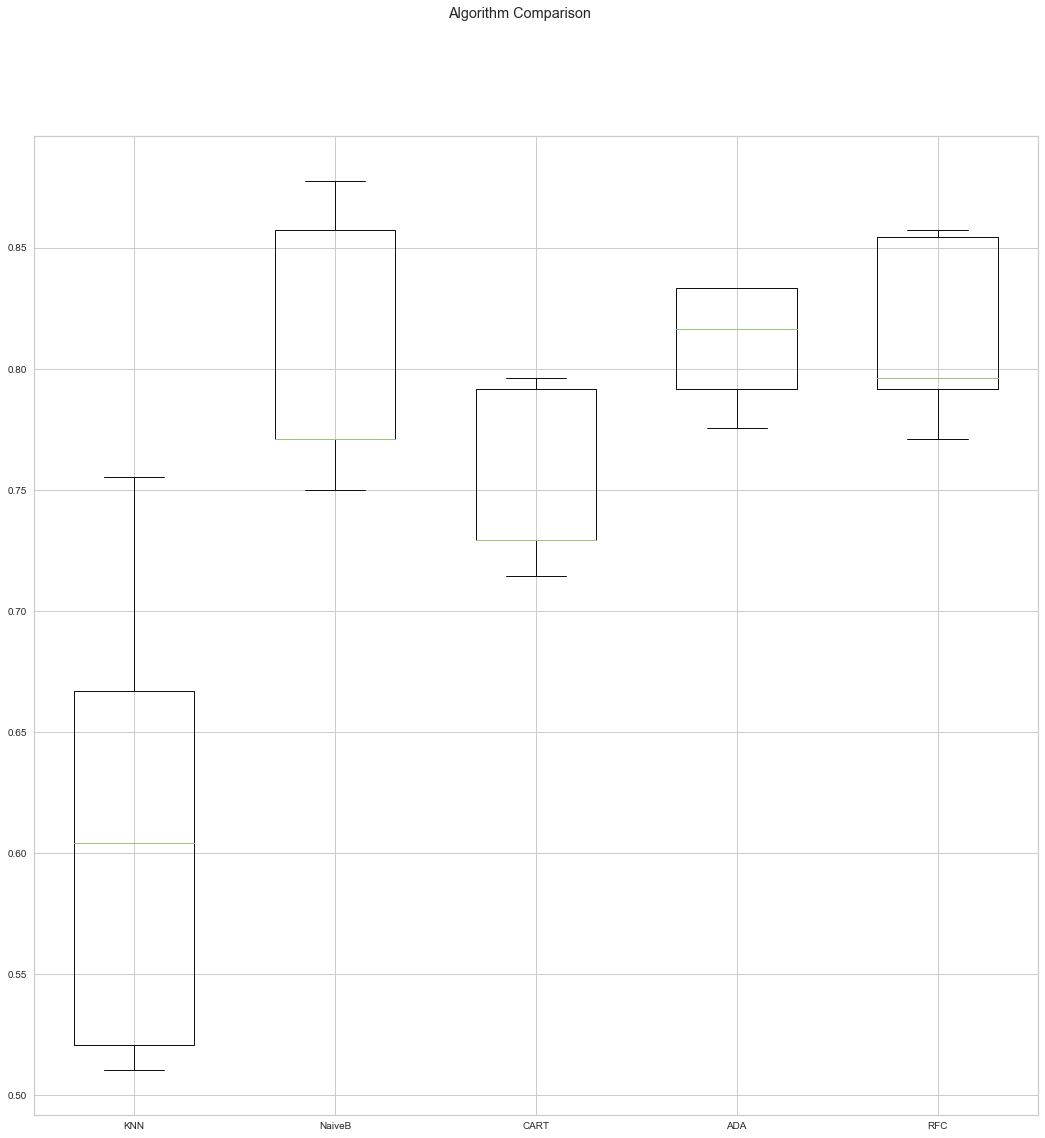

In [97]:
# Compare Algorithms
fig = plt.figure(figsize = (18,18))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, widths = 0.6)
ax.set_xticklabels(names)
plt.show()

1.	Voting Classifier -: The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. 

In [98]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1)

ensemble.fit(X_train, y_train)

predictions = ensemble.score(X_test, y_test)*100

print("The Voting Classifier Accuracy is: ", predictions)

The Voting Classifier Accuracy is:  81.9672131147541


Now we will make predictions on validation sheet, we will look at the accuracy score and classification report which is consisting of many important parameters

In [99]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions)*100)
    print(classification_report(y_test, predictions))

KNN
70.49180327868852
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        28
           1       0.78      0.64      0.70        33

   micro avg       0.70      0.70      0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61

NaiveB
88.52459016393442
              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

   micro avg       0.89      0.89      0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

CART
73.77049180327869
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

   micro avg       0.74      0.74      0.74        61
   macro avg       0.74      0.73      0.73        61
weig

Now we will look at the confusion matrix to evaluate the accuracy of a classification.

=== Confusion Matrix ===
[[20  8]
 [ 2 31]]




Text(0.5,29.5,'Predicted label')

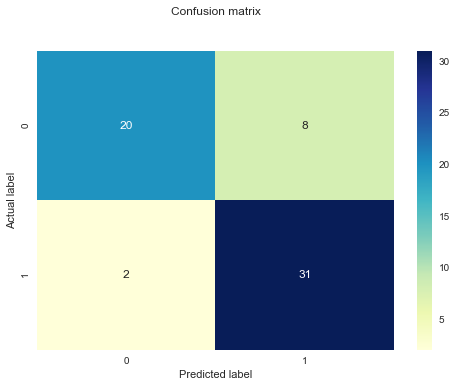

In [100]:
from sklearn.metrics import  confusion_matrix
predict = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predict))
print('\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Visualize a decision tree using Python export_graphviz.

In [101]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [102]:
estimator = model
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no Disease'
y_train_str[y_train_str == '1'] = 'Disease'
y_train_str = y_train_str.values

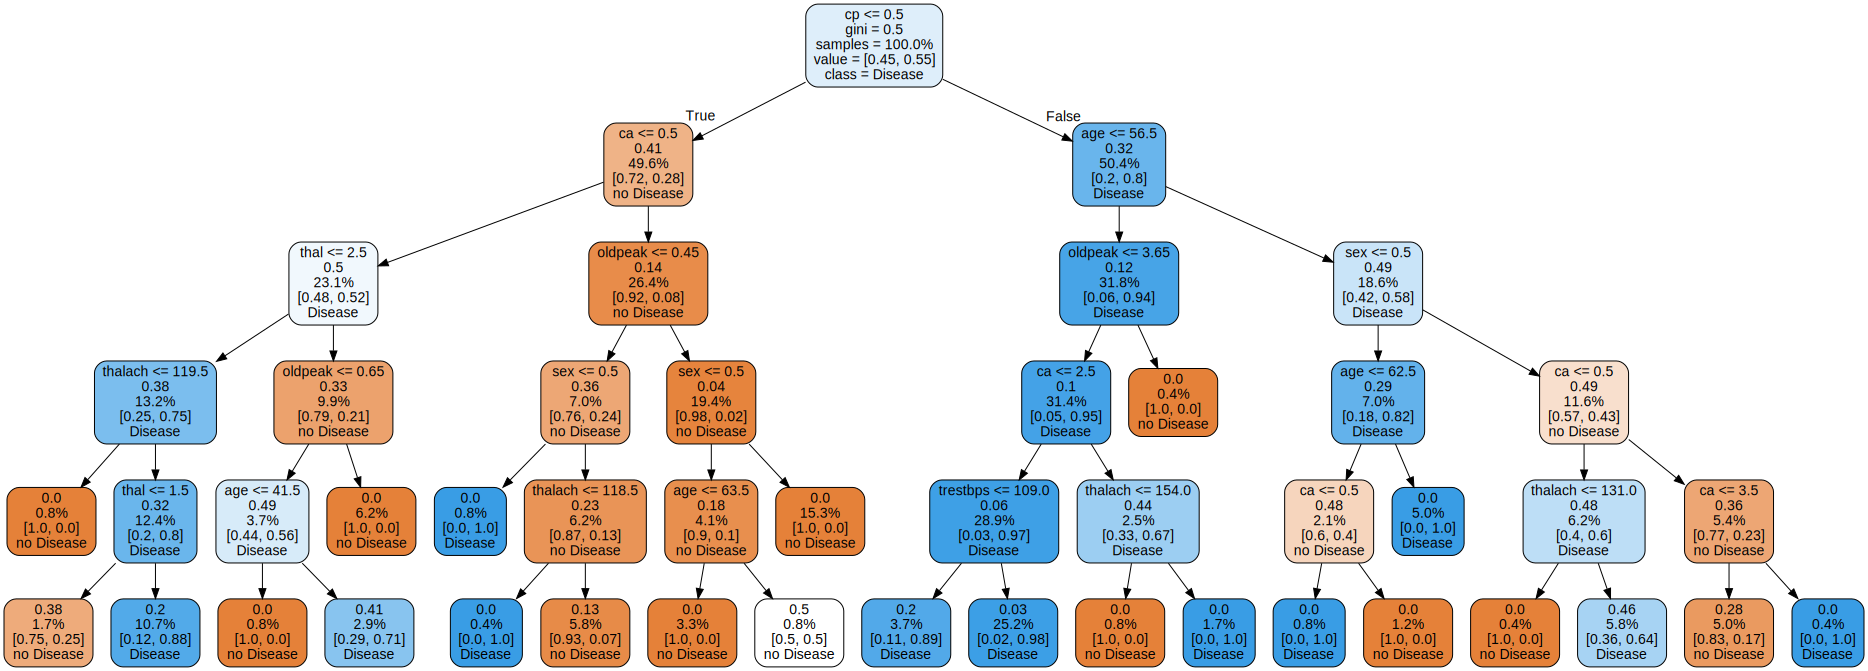

In [103]:
from sklearn.tree import export_graphviz #plot tree
import graphviz
export_graphviz(estimator, out_file='tree2.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)